In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dvc.api
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from IPython.display import display

In [2]:
# Load dataset using DVC
data_path = 'data/Walmart.csv'
with dvc.api.open(data_path, mode='r') as f:
    df = pd.read_csv(f)

# Display the dataset
print("Dataset Head:")
display(df.head())

Dataset Head:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Fix the date format issue
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')  # Use the correct format
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.drop(['Date'], axis=1, inplace=True)

# Define target and features
target = 'Weekly_Sales'
features = [i for i in df.columns if i not in [target]]

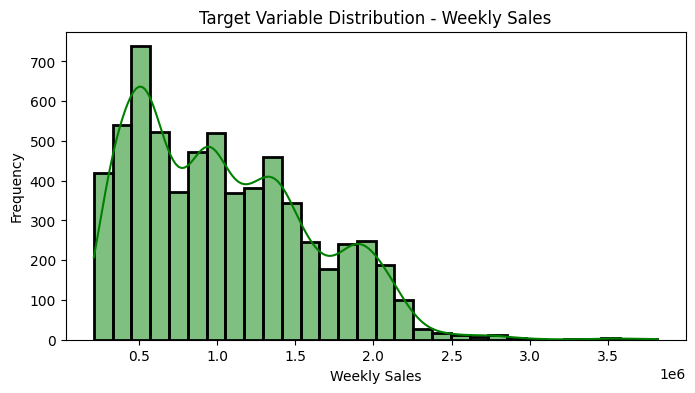

In [4]:
# EDA: Target Variable Distribution
plt.figure(figsize=[8, 4])
sns.histplot(df[target], color='g', edgecolor="black", linewidth=2, bins=30, kde=True)
plt.title('Target Variable Distribution - Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

                             Visualising Categorical Features:                              


/var/folders/wt/vtvf7jpx68v0m2wjtpxhxlx40000gn/T/ipykernel_6577/1628767670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cf[i], data=df, palette='viridis')
/var/folders/wt/vtvf7jpx68v0m2wjtpxhxlx40000gn/T/ipykernel_6577/1628767670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cf[i], data=df, palette='viridis')
/var/folders/wt/vtvf7jpx68v0m2wjtpxhxlx40000gn/T/ipykernel_6577/1628767670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cf[i], data=df, palette='viridis')


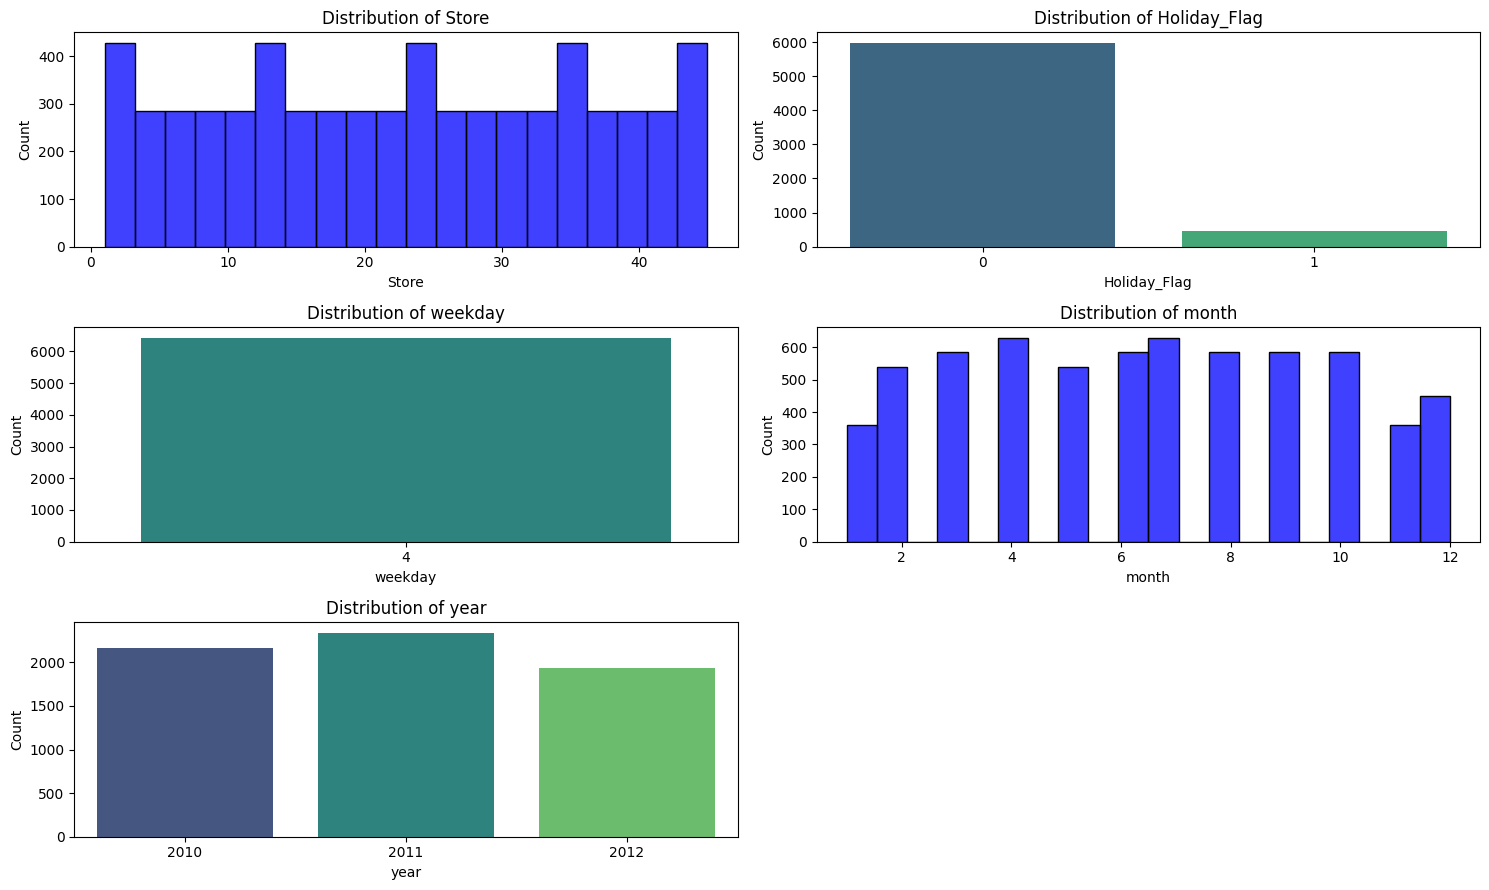

In [5]:
# Identify categorical and numerical features
nu = df[features].nunique().sort_values()
cf = [col for col in features if nu[col] <= 45]  # Categorical features
nf = [col for col in features if nu[col] > 45]   # Numerical features

# Plot categorical features
print('\033[1mVisualising Categorical Features:\033[0m'.center(100))
n = 2
plt.figure(figsize=[15, 3 * math.ceil(len(cf) / n)])

for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf) / n), n, i + 1)
    if df[cf[i]].nunique() <= 8:
        sns.countplot(x=cf[i], data=df, palette='viridis')
    else:
        sns.histplot(df[cf[i]], kde=False, bins=20, color='blue')
    plt.title(f'Distribution of {cf[i]}')
    plt.xlabel(cf[i])
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

                             Visualising Categorical Features:                              


/var/folders/wt/vtvf7jpx68v0m2wjtpxhxlx40000gn/T/ipykernel_6577/1628767670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cf[i], data=df, palette='viridis')
/var/folders/wt/vtvf7jpx68v0m2wjtpxhxlx40000gn/T/ipykernel_6577/1628767670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cf[i], data=df, palette='viridis')
/var/folders/wt/vtvf7jpx68v0m2wjtpxhxlx40000gn/T/ipykernel_6577/1628767670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cf[i], data=df, palette='viridis')


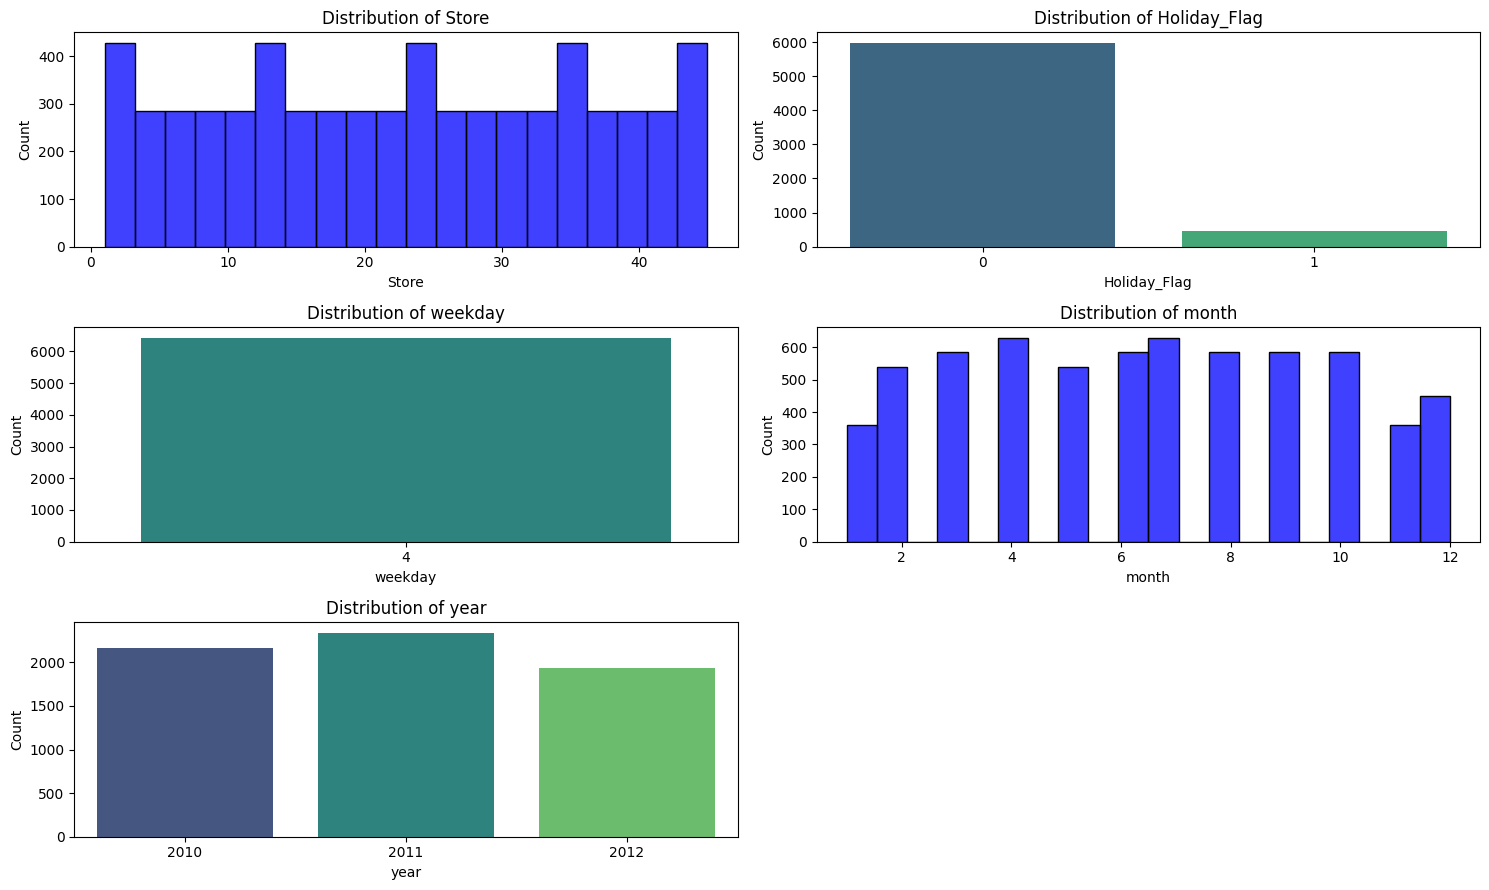

In [6]:
# Identify categorical and numerical features
nu = df[features].nunique().sort_values()
cf = [col for col in features if nu[col] <= 45]  # Categorical features
nf = [col for col in features if nu[col] > 45]   # Numerical features

# Plot categorical features
print('\033[1mVisualising Categorical Features:\033[0m'.center(100))
n = 2
plt.figure(figsize=[15, 3 * math.ceil(len(cf) / n)])

for i in range(len(cf)):
    plt.subplot(math.ceil(len(cf) / n), n, i + 1)
    if df[cf[i]].nunique() <= 8:
        sns.countplot(x=cf[i], data=df, palette='viridis')
    else:
        sns.histplot(df[cf[i]], kde=False, bins=20, color='blue')
    plt.title(f'Distribution of {cf[i]}')
    plt.xlabel(cf[i])
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

                                              Numeric Features Distribution                                               


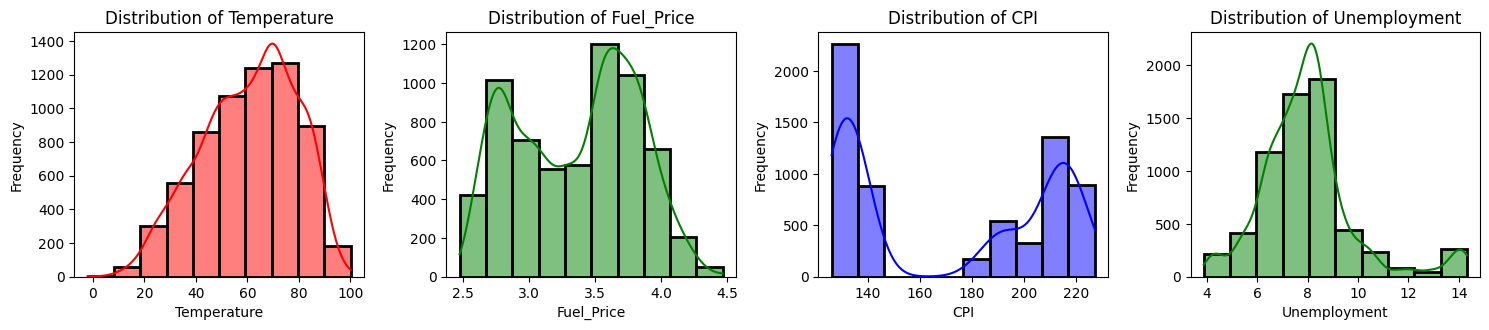

In [7]:
# Plot numeric features
print('\033[1mNumeric Features Distribution\033[0m'.center(130))
n = 4
clr = ['r', 'g', 'b', 'g', 'b', 'r']

plt.figure(figsize=[15, 6 * math.ceil(len(nf) / n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf) / 3), n, i + 1)
    sns.histplot(df[nf[i]], color=clr[i % len(clr)], edgecolor="black", linewidth=2, bins=10, kde=True)
    plt.title(f'Distribution of {nf[i]}')
    plt.xlabel(nf[i])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

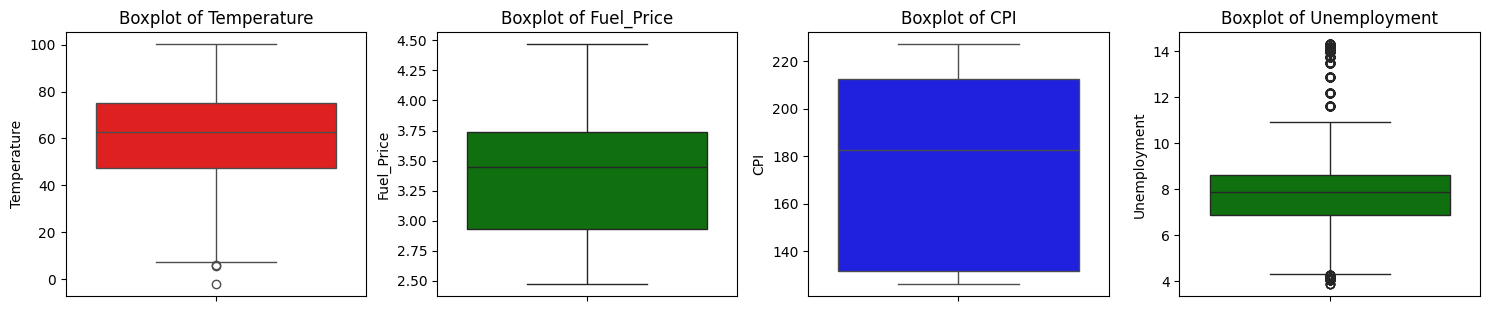

In [8]:
# Boxplots for numeric features
plt.figure(figsize=[15, 6 * math.ceil(len(nf) / n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf) / 3), n, i + 1)
    sns.boxplot(y=df[nf[i]], color=clr[i % len(clr)])
    plt.title(f'Boxplot of {nf[i]}')
    plt.ylabel(nf[i])

plt.tight_layout()
plt.show()

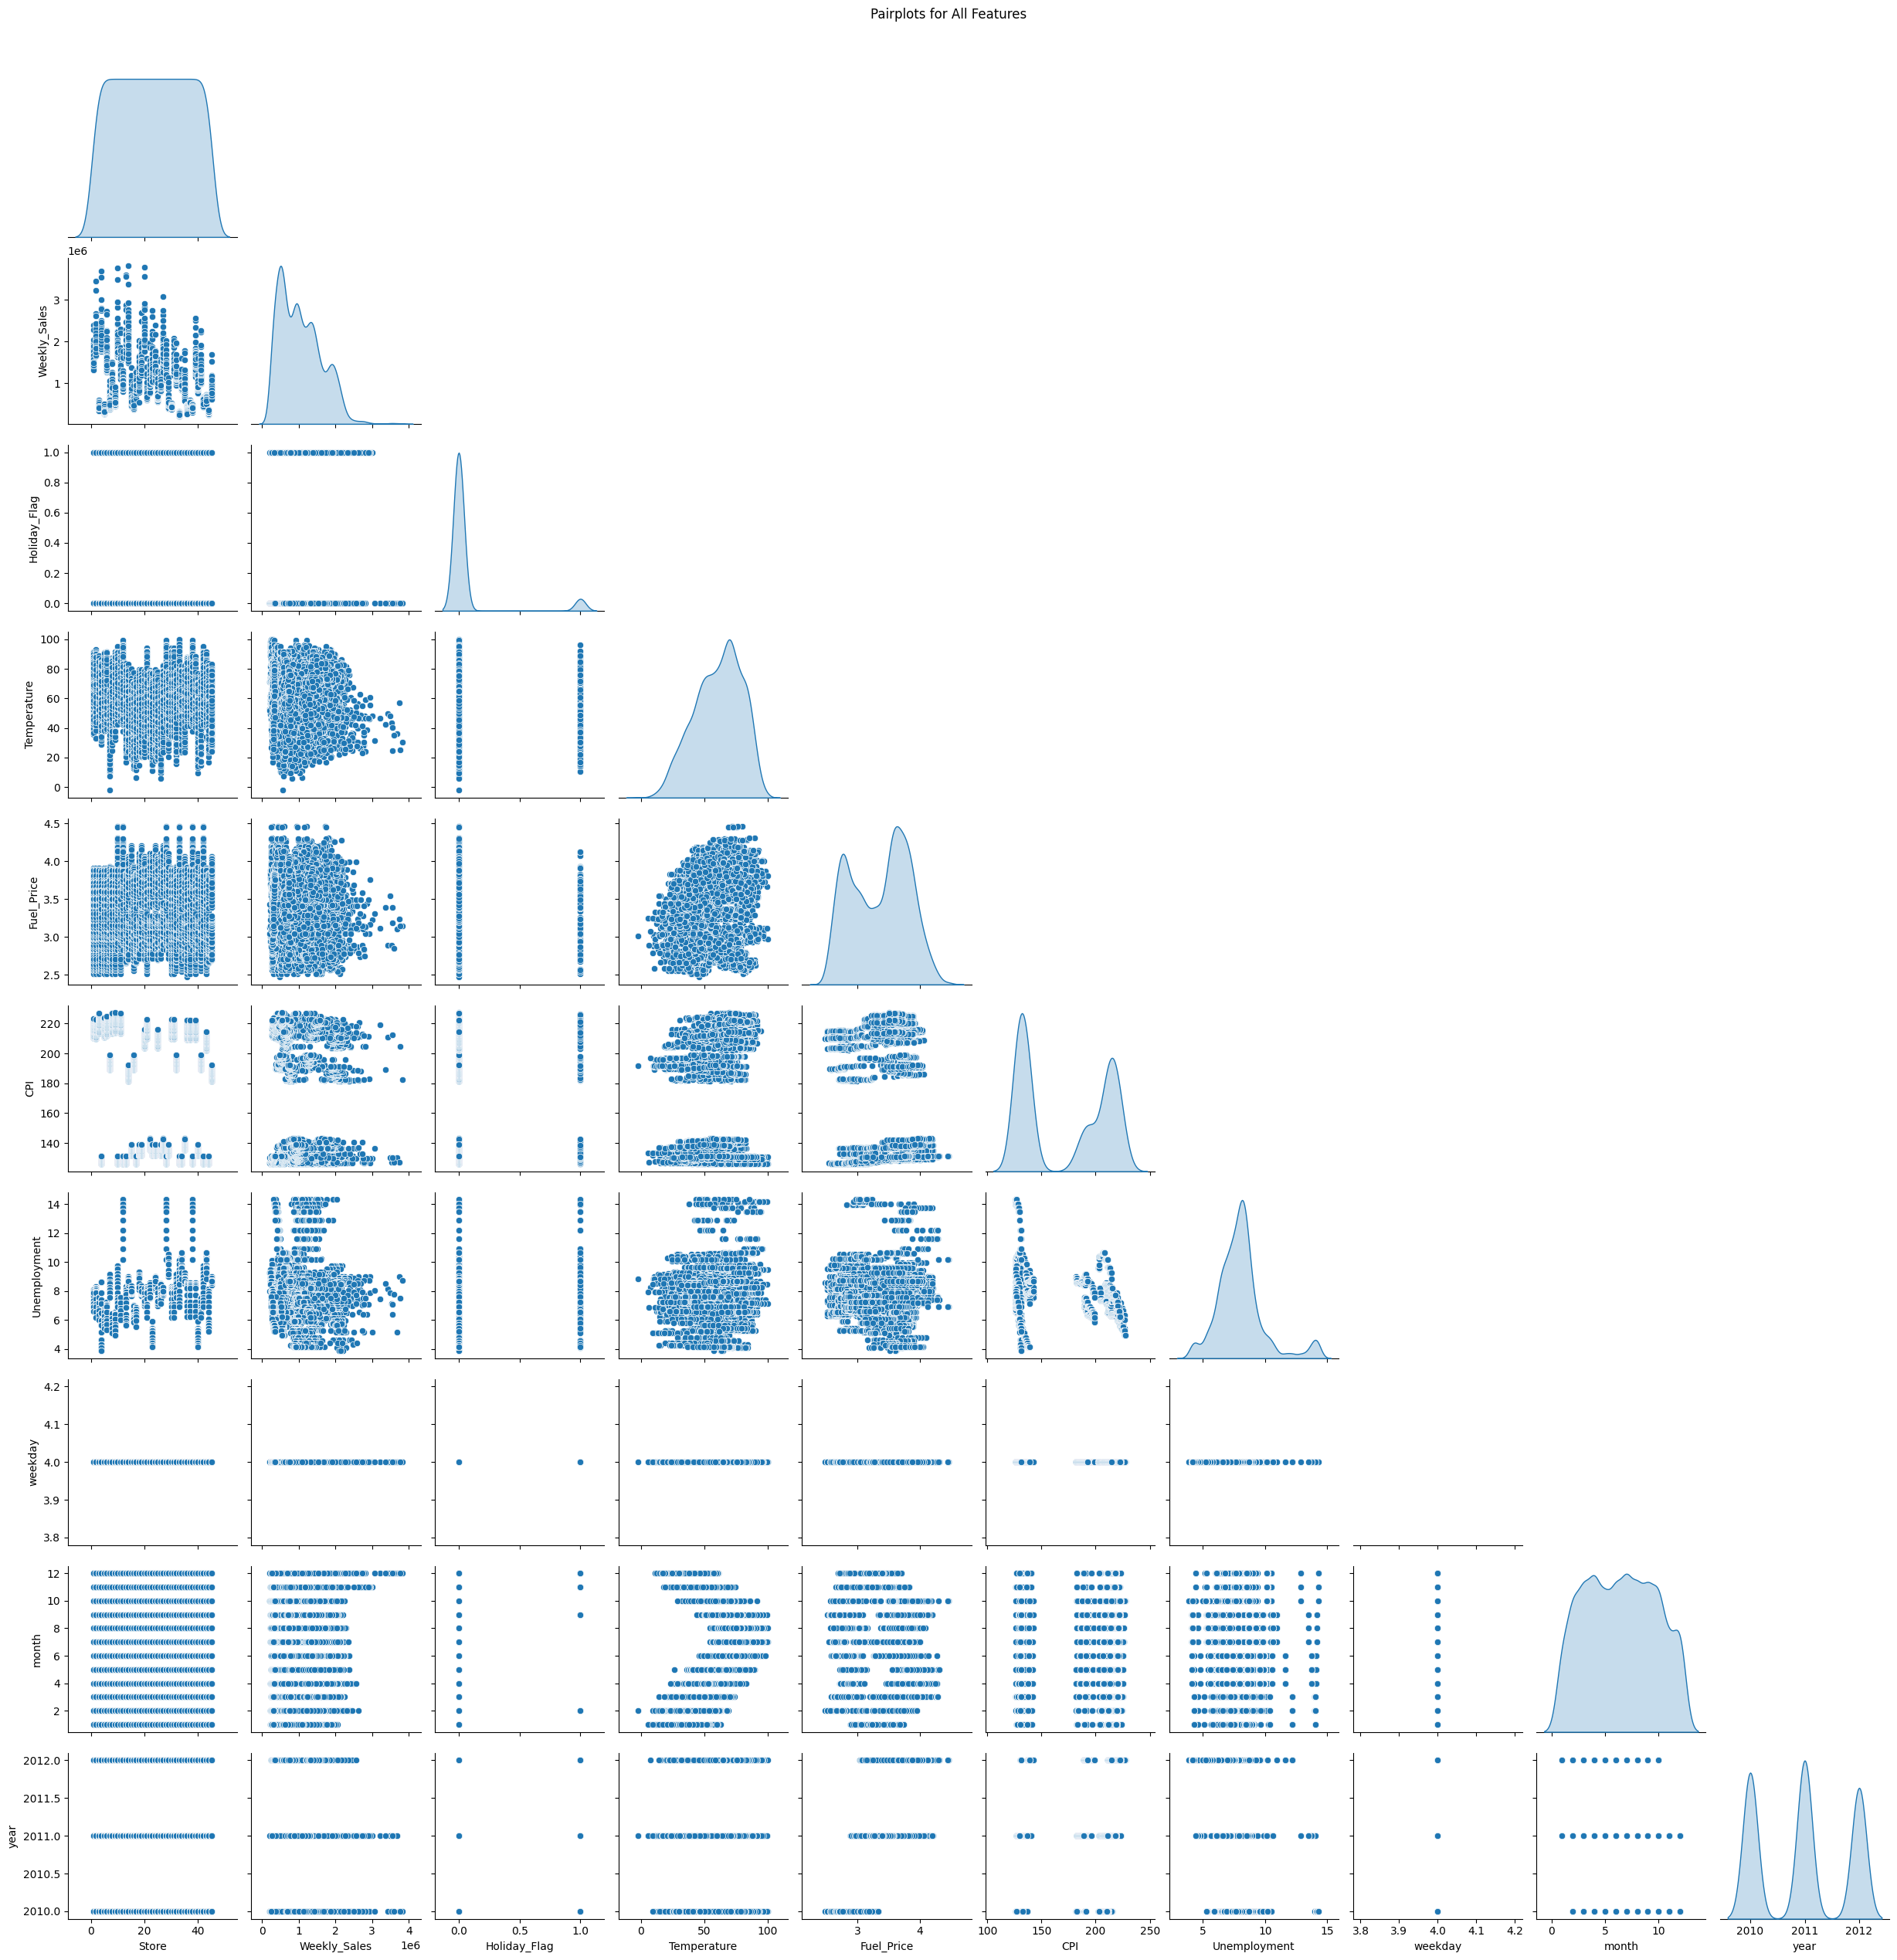

In [9]:
# Pairplots for all features
g = sns.pairplot(df, diag_kind='kde', corner=True)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.suptitle('Pairplots for All Features', y=1.02)
plt.show()

In [11]:
# Remove duplicate rows
original_df = df.copy(deep=True)
rs, cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape == (rs, cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs - df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [12]:
# Check for missing values
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values'] / df.shape[0], 3) * 100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


In [13]:
# One-Hot and Dummy Encoding
df3 = df.copy()

ecc = nvc[nvc['Percentage'] != 0].index.values
fcc = [i for i in cf if i not in ecc]
oh = True
dm = True

for i in fcc:
    if df3[i].nunique() == 2:
        if oh:
            print("\033[1mOne-Hot Encoding on features:\033[0m")
            print(i)
            oh = False
        df3[i] = pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if df3[i].nunique() > 2:
        if dm:
            print("\n\033[1mDummy Encoding on features:\033[0m")
            print(i)
            dm = False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))], axis=1)

print("\nShape after encoding:", df3.shape)


Dummy Encoding on features:
Store
One-Hot Encoding on features:
Holiday_Flag

Shape after encoding: (6435, 64)


In [14]:
# Remove outliers using IQR
df1 = df3.copy()

for i in nf:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3 + (1.5 * IQR))]
    df1 = df1[df1[i] >= (Q1 - (1.5 * IQR))]
    df1 = df1.reset_index(drop=True)

print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))


Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5951 samples.


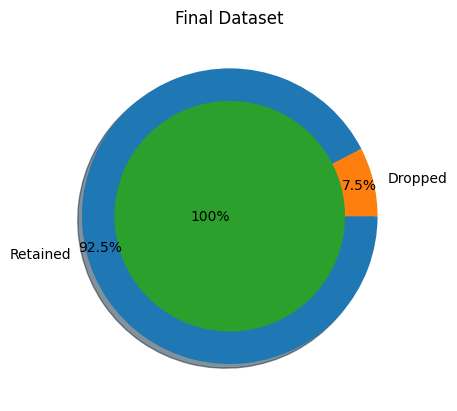


Inference: After the cleanup process, 484 samples were dropped, while retaining 7.52% of the data.


In [15]:
# Final dataset
df = df1.copy()
df.columns = [i.replace('-', '_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0] - df.shape[0]], radius=1, labels=['Retained', 'Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0, 0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0] - df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0] * 100 / (original_df.shape[0])), 2)}% of the data.')

In [16]:
# Data Manipulation
df.columns = [i.replace(' ', '_') for i in df.columns]
X = df.drop([target], axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True, inplace=True)

print('Original set  ---> ', X.shape, Y.shape, '\nTraining set  ---> ', Train_X.shape, Train_Y.shape, '\nTesting set   ---> ', Test_X.shape, '', Test_Y.shape)

Original set  --->  (5951, 63) (5951,) 
Training set  --->  (4760, 63) (4760,) 
Testing set   --->  (1191, 63)  (1191,)


In [17]:
# Standardization
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n', '\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,Store_2,Store_3,Store_4,Store_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
count,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4760.0,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,...,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03
mean,-2.836200e-17,3.381049e-16,-2.573105e-16,-1.970413e-16,1.470346e-16,0.0,-2.612289e-17,2.612289e-17,-1.492737e-17,1.604692e-17,...,2.836200e-17,3.731842e-18,-3.881116e-17,-3.582568e-17,-2.649608e-17,1.865921e-17,2.388379e-17,-4.478211e-17,-2.537653e-17,-8.060779e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,0.0,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.738200e-01,-2.765561e+00,-1.882567e+00,-1.253019e+00,-2.756102e+00,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,-7.573333e-01,-6.389711e-01
25%,-2.738200e-01,-7.381554e-01,-9.805747e-01,-1.081047e+00,-6.733832e-01,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,-7.573333e-01,-6.389711e-01
50%,-2.738200e-01,1.104625e-01,1.676130e-01,3.832999e-01,1.014883e-01,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,-7.573333e-01,-6.389711e-01
75%,-2.738200e-01,7.716204e-01,8.364814e-01,9.915222e-01,6.191444e-01,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,1.320423e+00,1.565016e+00
max,3.652034e+00,2.180435e+00,2.466167e+00,1.338949e+00,2.580110e+00,0.0,6.501748e+00,6.471699e+00,6.757712e+00,6.724105e+00,...,3.370999e+00,3.185521e+00,3.064802e+00,3.129481e+00,3.117807e+00,3.068510e+00,4.110321e+00,3.681925e+00,1.320423e+00,1.565016e+00



                                          Standardardization on Testing set                                          


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,Store_2,Store_3,Store_4,Store_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.0,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.009659,0.036099,0.037806,0.007451,-0.022689,0.0,0.030606,0.023515,-0.008822,0.082107,...,0.045173,0.006347,0.043859,-0.015472,-0.026253,-0.072237,0.012590,0.037116,0.020735,0.053129
std,1.016565,1.024013,0.982381,1.009229,1.009840,0.0,1.092864,1.071897,0.970776,1.238721,...,1.066674,1.009476,1.057886,0.978309,0.962630,0.892935,1.024406,1.061201,1.006030,1.023355
min,-0.273820,-2.877436,-1.793239,-1.253019,-2.756102,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,-0.757333,-0.638971
25%,-0.273820,-0.668574,-0.930464,-1.081222,-0.688300,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,-0.757333,-0.638971
50%,-0.273820,0.163945,0.226439,0.384170,0.074074,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,-0.757333,-0.638971
75%,-0.273820,0.846932,0.823409,1.012806,0.633658,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,1.320423,1.565016
max,3.652034,2.071834,2.466167,1.343977,2.580110,0.0,6.501748,6.471699,6.757712,6.724105,...,3.370999,3.185521,3.064802,3.129481,3.117807,3.068510,4.110321,3.681925,1.320423,1.565016


                                       Correlation Matrix                                       


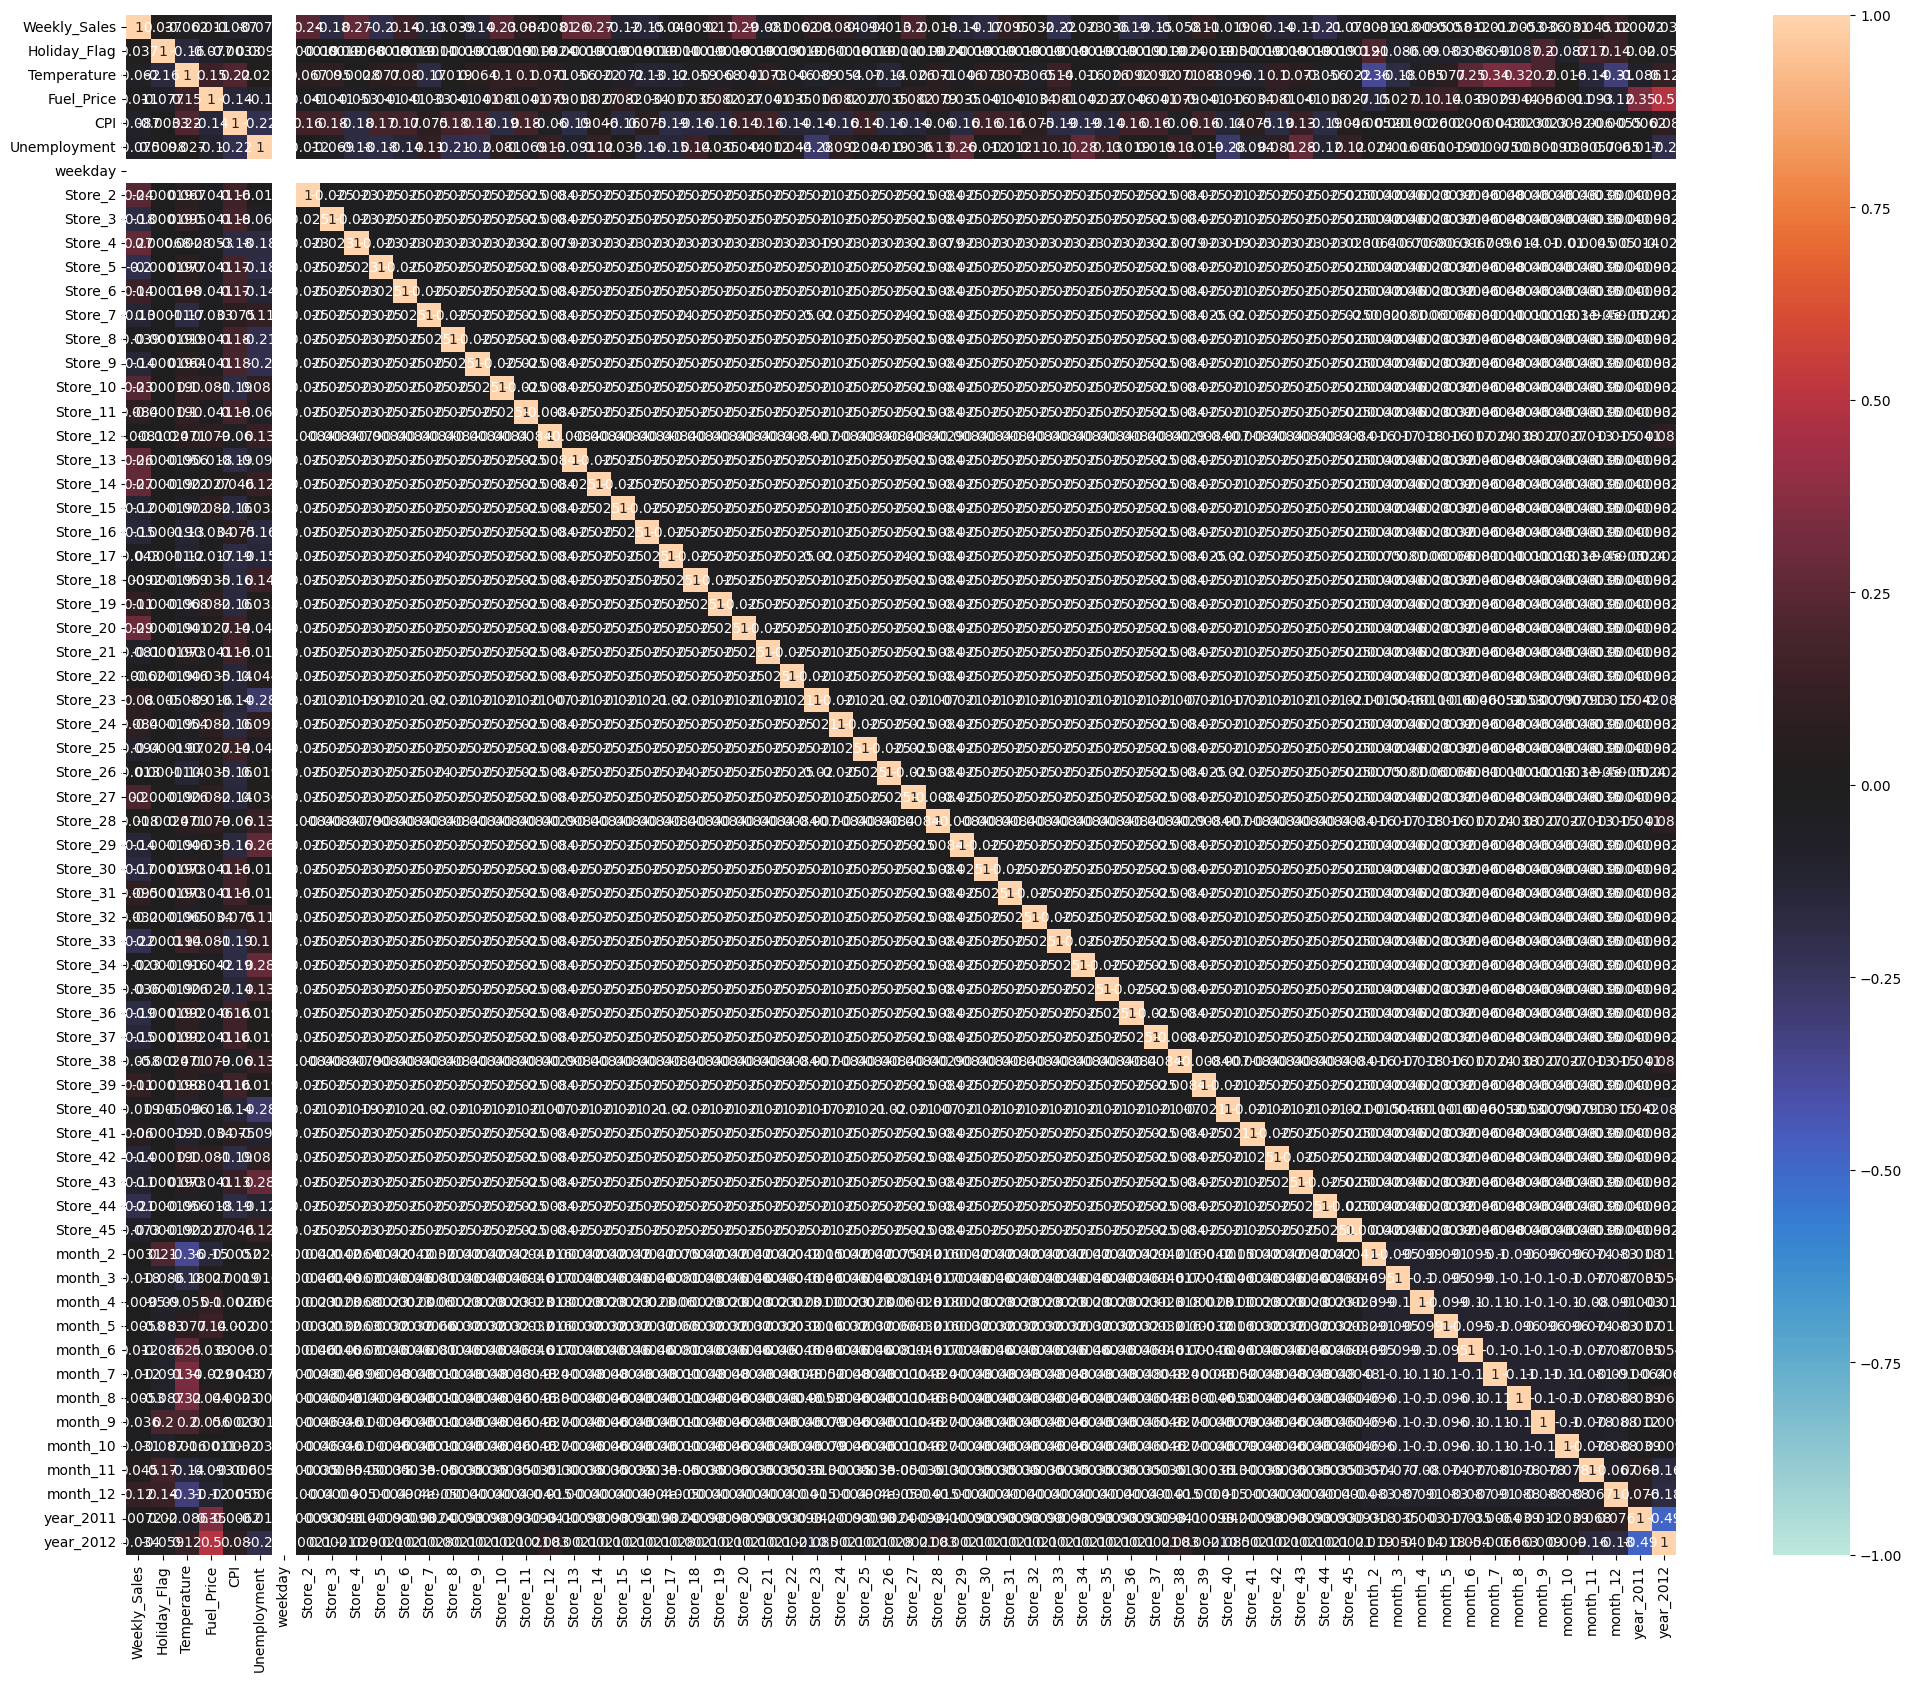

In [18]:
# Correlation Matrix
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25, 20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

                                         Standardardization on Training set                                         


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,Store_2,Store_3,Store_4,Store_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
count,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4760.0,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,...,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03,4.760000e+03
mean,-2.836200e-17,3.381049e-16,-2.573105e-16,-1.970413e-16,1.470346e-16,0.0,-2.612289e-17,2.612289e-17,-1.492737e-17,1.604692e-17,...,2.836200e-17,3.731842e-18,-3.881116e-17,-3.582568e-17,-2.649608e-17,1.865921e-17,2.388379e-17,-4.478211e-17,-2.537653e-17,-8.060779e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,0.0,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.738200e-01,-2.765561e+00,-1.882567e+00,-1.253019e+00,-2.756102e+00,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,-7.573333e-01,-6.389711e-01
25%,-2.738200e-01,-7.381554e-01,-9.805747e-01,-1.081047e+00,-6.733832e-01,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,-7.573333e-01,-6.389711e-01
50%,-2.738200e-01,1.104625e-01,1.676130e-01,3.832999e-01,1.014883e-01,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,-7.573333e-01,-6.389711e-01
75%,-2.738200e-01,7.716204e-01,8.364814e-01,9.915222e-01,6.191444e-01,0.0,-1.538048e-01,-1.545189e-01,-1.479791e-01,-1.487187e-01,...,-2.966479e-01,-3.139204e-01,-3.262853e-01,-3.195418e-01,-3.207383e-01,-3.258910e-01,-2.432900e-01,-2.715970e-01,1.320423e+00,1.565016e+00
max,3.652034e+00,2.180435e+00,2.466167e+00,1.338949e+00,2.580110e+00,0.0,6.501748e+00,6.471699e+00,6.757712e+00,6.724105e+00,...,3.370999e+00,3.185521e+00,3.064802e+00,3.129481e+00,3.117807e+00,3.068510e+00,4.110321e+00,3.681925e+00,1.320423e+00,1.565016e+00



                                          Standardardization on Testing set                                          


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,Store_2,Store_3,Store_4,Store_5,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2011,year_2012
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.0,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.009659,0.036099,0.037806,0.007451,-0.022689,0.0,0.030606,0.023515,-0.008822,0.082107,...,0.045173,0.006347,0.043859,-0.015472,-0.026253,-0.072237,0.012590,0.037116,0.020735,0.053129
std,1.016565,1.024013,0.982381,1.009229,1.009840,0.0,1.092864,1.071897,0.970776,1.238721,...,1.066674,1.009476,1.057886,0.978309,0.962630,0.892935,1.024406,1.061201,1.006030,1.023355
min,-0.273820,-2.877436,-1.793239,-1.253019,-2.756102,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,-0.757333,-0.638971
25%,-0.273820,-0.668574,-0.930464,-1.081222,-0.688300,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,-0.757333,-0.638971
50%,-0.273820,0.163945,0.226439,0.384170,0.074074,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,-0.757333,-0.638971
75%,-0.273820,0.846932,0.823409,1.012806,0.633658,0.0,-0.153805,-0.154519,-0.147979,-0.148719,...,-0.296648,-0.313920,-0.326285,-0.319542,-0.320738,-0.325891,-0.243290,-0.271597,1.320423,1.565016
max,3.652034,2.071834,2.466167,1.343977,2.580110,0.0,6.501748,6.471699,6.757712,6.724105,...,3.370999,3.185521,3.064802,3.129481,3.117807,3.068510,4.110321,3.681925,1.320423,1.565016


                                       Correlation Matrix                                       


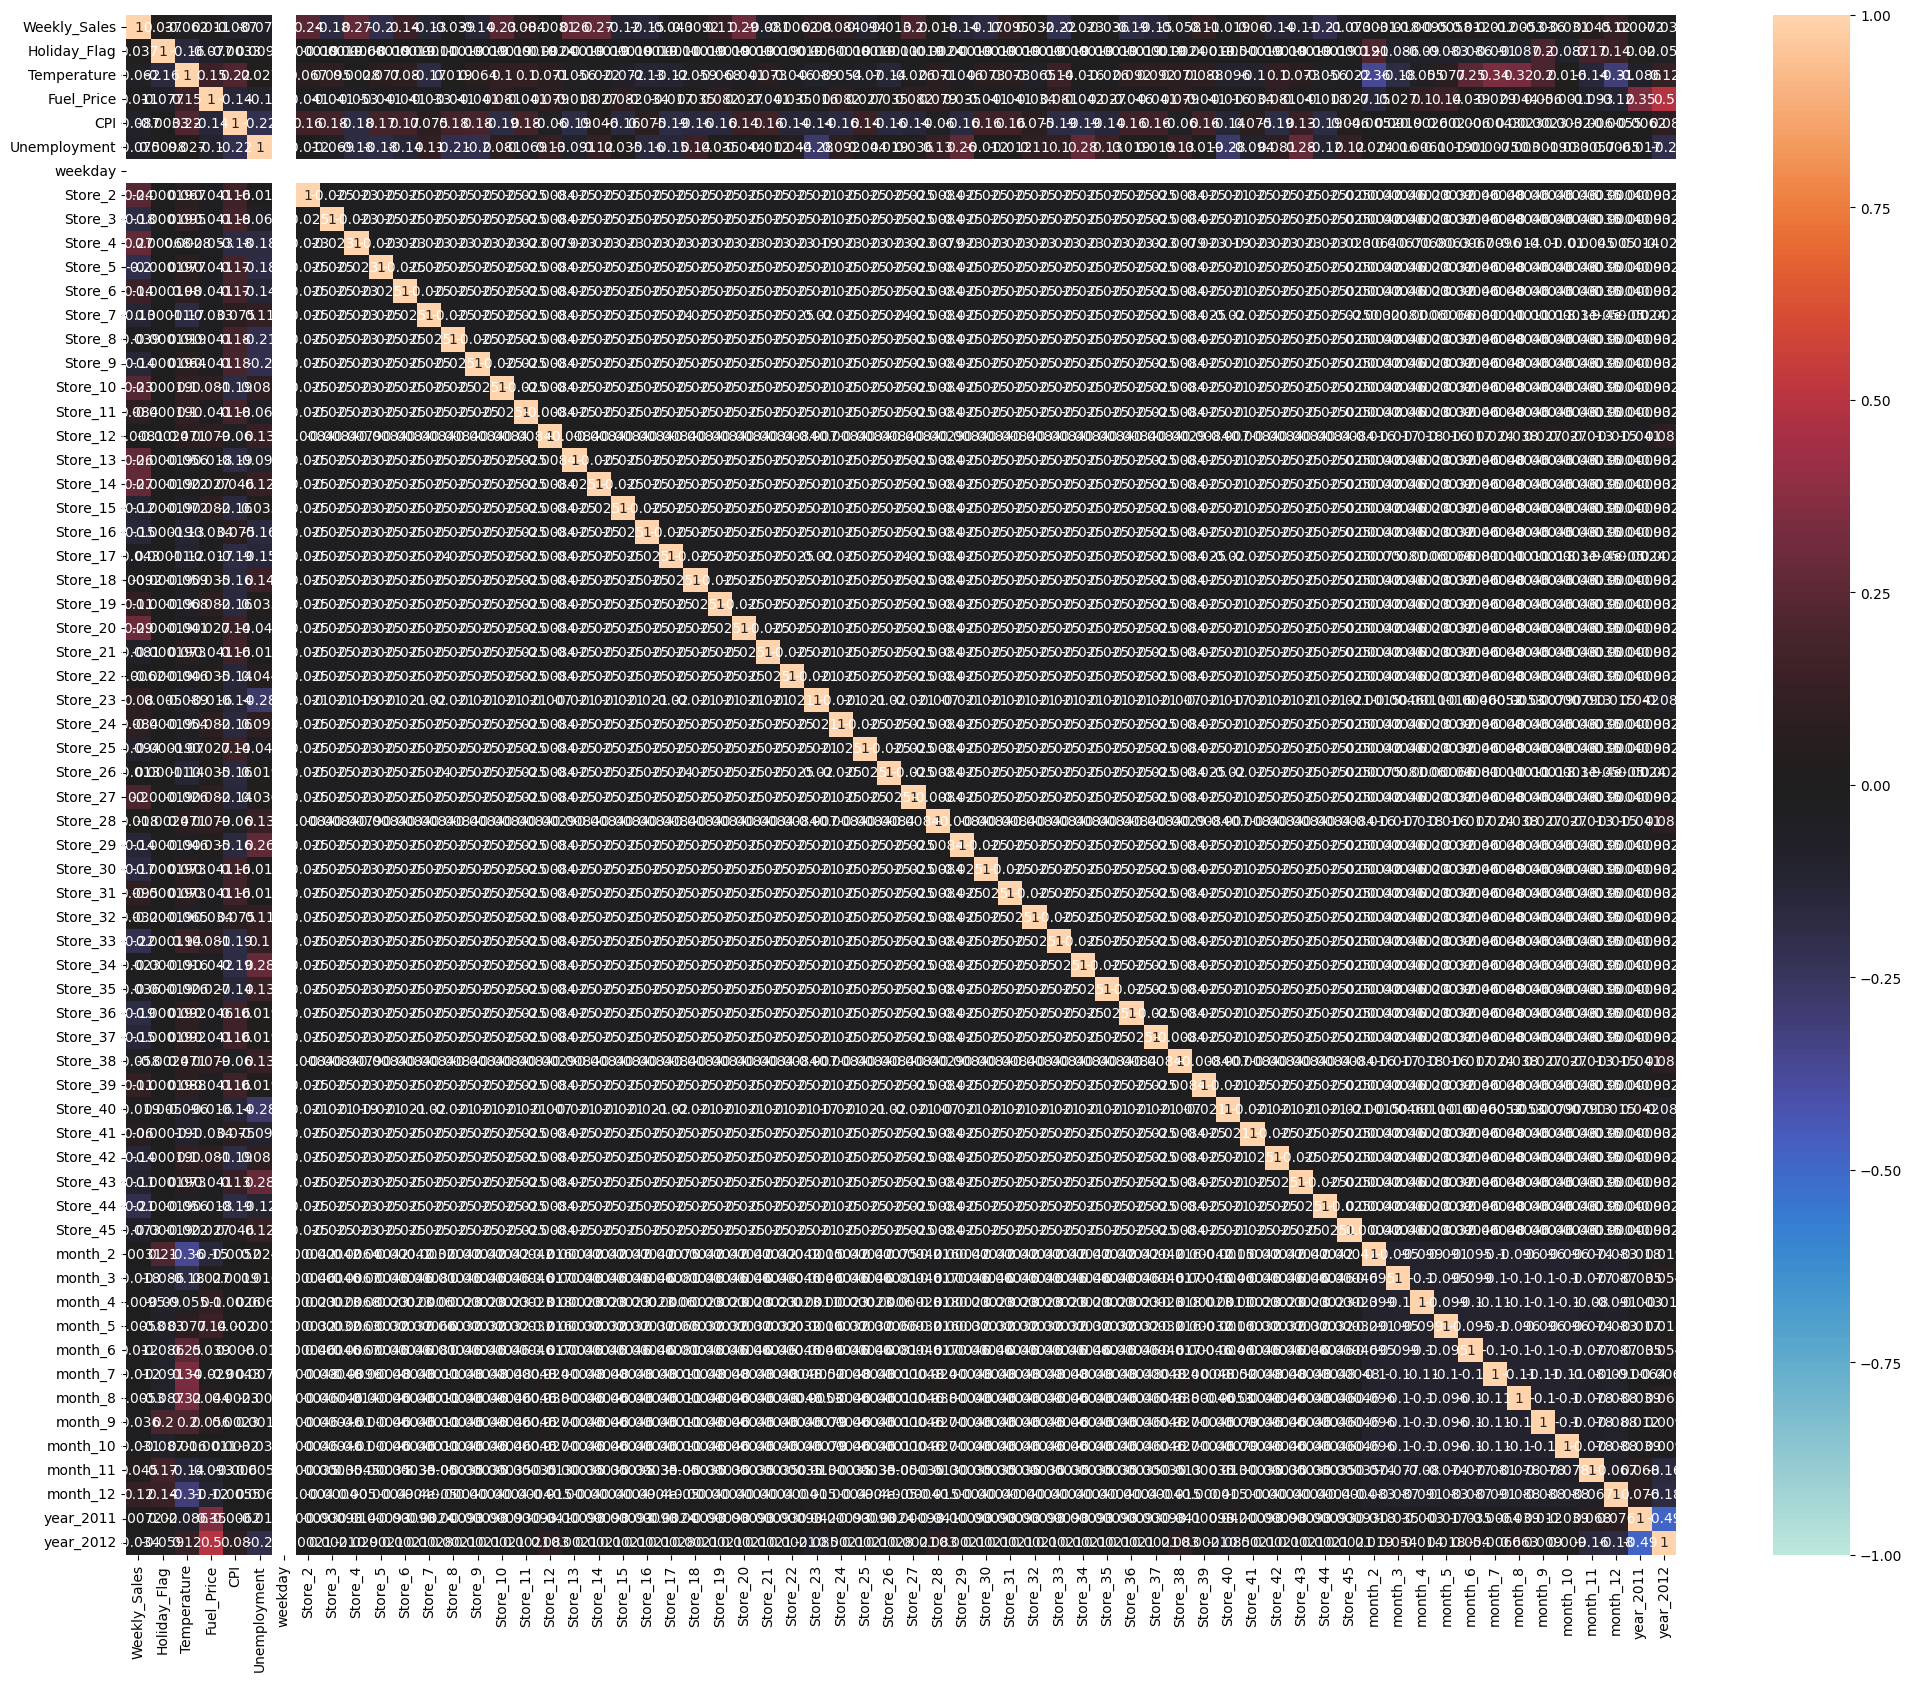

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):               0.00
Time:                        01:45:23   Log-Likelihood:                -63174.
No. Observations:                4760   AIC:                         1.265e+05
Df Residuals:                    4697   BIC:                         1.269e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.05e+06   2049.861    512.399   

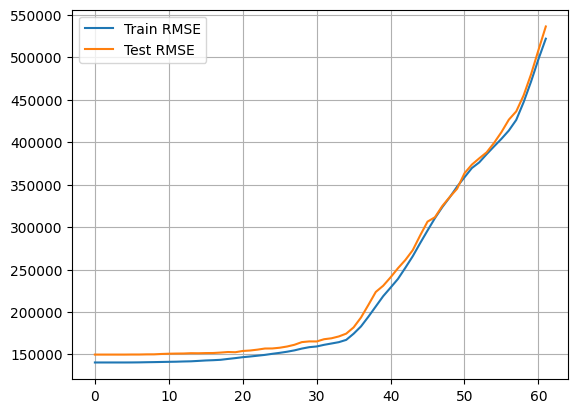

In [21]:
# Standardization
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

# Ensure indices are aligned
Train_X_std.reset_index(drop=True, inplace=True)
Train_Y.reset_index(drop=True, inplace=True)

# Display standardized training set
display(Train_X_std.describe())

print('\n', '\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

# Ensure indices are aligned
Test_X_std.reset_index(drop=True, inplace=True)
Test_Y.reset_index(drop=True, inplace=True)

# Display standardized testing set
display(Test_X_std.describe())

# Correlation Matrix
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25, 20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

# Recursive Feature Elimination (RFE)
Train_xy = pd.concat([Train_X_std, Train_Y.reset_index(drop=True)], axis=1)
a = Train_xy.columns.values

# Fit the OLS model
API = sm.OLS(Train_Y, sm.add_constant(Train_X_std)).fit()
print(API.summary())

# Polynomial Features and RFE
Trr = []
Tss = []
n = 3
order = ['ord-' + str(i) for i in range(2, n)]
Trd = pd.DataFrame(np.zeros((10, n - 2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10, n - 2)), columns=order)

m = df.shape[1] - 2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1] - i)  # Running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

In [23]:
# Train the model
model = LinearRegression()
model.fit(Train_X_std, Train_Y)

# Make predictions
y_pred = model.predict(Test_X_std)

# Calculate metrics
r2 = r2_score(Test_Y, y_pred)
mae = mean_absolute_error(Test_Y, y_pred)
mse = mean_squared_error(Test_Y, y_pred)

# Log metrics
mlflow.log_metric("r2_score", r2)
mlflow.log_metric("mean_absolute_error", mae)
mlflow.log_metric("mean_squared_error", mse)

# Print metrics
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

R2 Score: 0.9333587154328882
Mean Absolute Error: 88302.59745305449
Mean Squared Error: 22433421080.892902
